In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

In [3]:
obs_dir = '/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/'
mlmodel_dir = '/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/output/slr_models/all_dev/GFS_output/'

In [4]:
site, interval = 'CLNX', 12

obs_file = glob(obs_dir + '%s*.pd'%site)[0]
model_file = glob(mlmodel_dir + '%s/%s_%d*.pd'%(site, site, interval))[0]

In [5]:
obs = pd.read_pickle(obs_file).reset_index().rename(
    columns={'datetime_utc':'valid'}).set_index('valid')
    
obs = obs[[k for k in obs.keys() if str(interval) in k]]
obs = obs.rename(columns={k:'obs_' + k.replace('%s'%interval, '') for k in obs.keys()})

swe_min = 2.54 #0.1 in 
obs = obs[obs['obs_swe_mm'] >= 2.54]

obs

,obs_slr,obs_snow_mm,obs_swe_mm
valid,,,
1999-11-08 09:00:00,9.520000,101.599998,10.670000
1999-11-17 09:00:00,11.320000,152.399994,13.460000
1999-11-20 09:00:00,18.209999,50.799999,2.790000
1999-11-20 21:00:00,8.700000,50.799999,5.840000
1999-11-21 09:00:00,25.000000,254.000000,10.160000
...,...,...,...
2019-04-20 09:00:00,4.540000,25.400000,5.590000
2019-04-21 21:00:00,9.100000,25.400000,2.790000
2019-04-26 09:00:00,0.000000,0.000000,6.350000


In [6]:
model = pd.read_pickle(model_file)
model = model.rename(columns={k:'mod_'+k for k in model.keys()})
model

,mod_snow_mm,mod_swe_mm,mod_slr
valid,,,
2015-01-15 21:00:00,0,0,NaN
2015-01-16 09:00:00,0,0,NaN
2015-01-16 21:00:00,0,0,NaN
2015-01-17 09:00:00,5.30383,0.5,10.6
2015-01-17 21:00:00,0,0,NaN
...,...,...,...
2019-05-30 09:00:00,87.342,9,9.7
2019-05-30 21:00:00,4.36902,0.3125,14
2019-05-31 09:00:00,57.8872,3.9375,14.7


In [7]:
match = obs.merge(model, on='valid')
match = match.dropna(how='any')
match

,obs_slr,obs_snow_mm,obs_swe_mm,mod_snow_mm,mod_swe_mm,mod_slr
valid,,,,,,
2015-01-28 21:00:00,5.88,25.400000,4.320000,49.9231,4.9,10.2
2015-01-30 09:00:00,10.00,25.400000,2.540000,20.4429,1.9,10.8
2015-02-02 09:00:00,5.88,25.400000,4.320000,7.09603,0.3,23.7
2015-02-02 21:00:00,7.15,38.099998,5.330000,17.5746,1.3,13.5
2015-02-03 09:00:00,7.50,76.199997,10.160000,123.092,8.49,14.5
...,...,...,...,...,...,...
2019-04-16 21:00:00,8.86,177.800003,20.070000,171.298,12.3125,13.9
2019-04-21 21:00:00,9.10,25.400000,2.790000,63.6808,5.125,12.4
2019-04-26 09:00:00,0.00,0.000000,6.350000,53.8026,4.3125,12.5


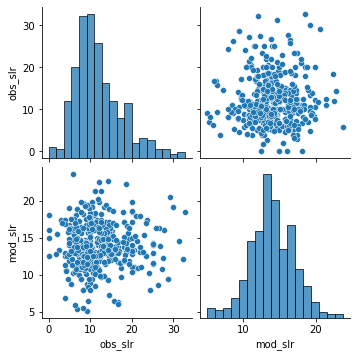

In [8]:
sns.pairplot(match[['obs_slr', 'mod_slr']])

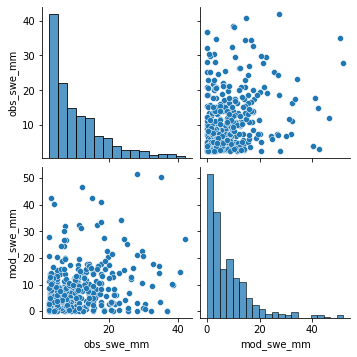

In [9]:
sns.pairplot(match[['obs_swe_mm', 'mod_swe_mm']])

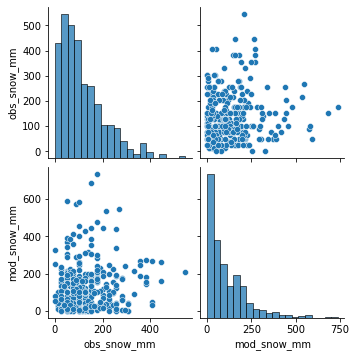

In [10]:
sns.pairplot(match[['obs_snow_mm', 'mod_snow_mm']])